In [1]:
from scipy.integrate import solve_ivp
from scipy.stats import gamma as gamma_dist
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
import sys
sys.path.append("../code")
import model_ramp as model
import plotting
import parametros

In [3]:
params_model = parametros.params.copy()
y0 = params_model['y0']
y0[0]+=6
y0[7]-=6
params_model.update({'y0':y0})
params_model.update( {'epsilon_u':0.1, 'epsilon_w':0.1} )

params_model_noR = params_model.copy()
params_model_noVac = params_model.copy()
params_model_noBoth = params_model.copy()

params_model_noR.update( {'alpha_R':0.0} )
params_model_noVac.update( {'alpha_u':0.0, 'alpha_w':0.0} )
params_model_noBoth.update( {'alpha_R':0.0, 'alpha_u':0.0, 'alpha_w':0.0} )

In [4]:
m0 = model.Model(**params_model)
mR = model.Model(**params_model_noR)
mV = model.Model(**params_model_noVac)
mB = model.Model(**params_model_noBoth)

In [5]:
times, data = m0.run()
times, data = mR.run()
times, data = mV.run()
times, data = mB.run()

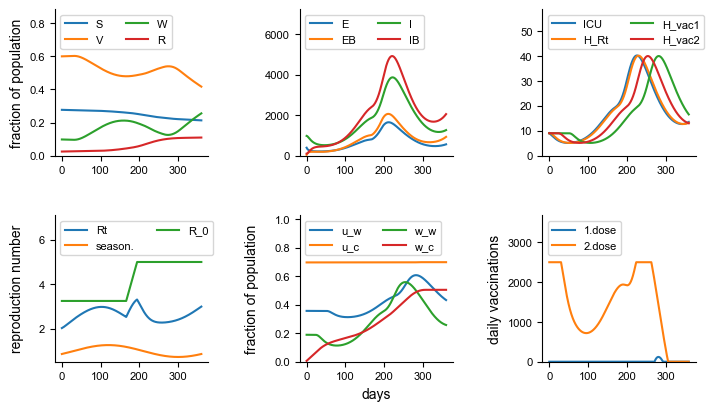

In [6]:
plotting.overview(m0, arial=True)

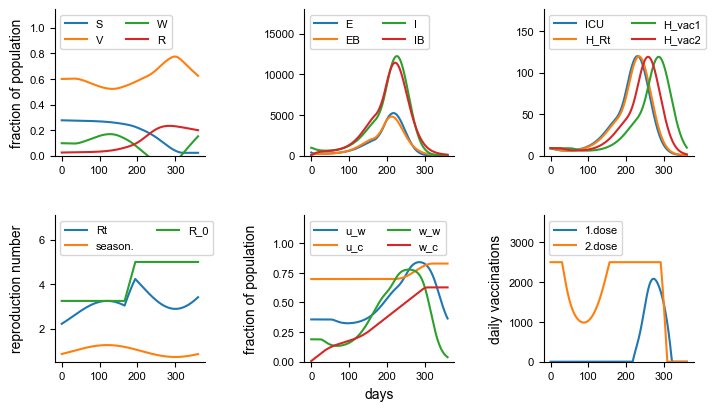

In [7]:
plotting.overview(mR, arial=True)

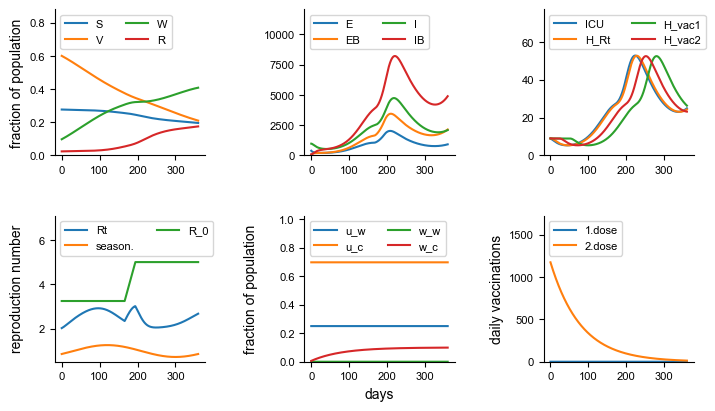

In [8]:
plotting.overview(mV, arial=True)

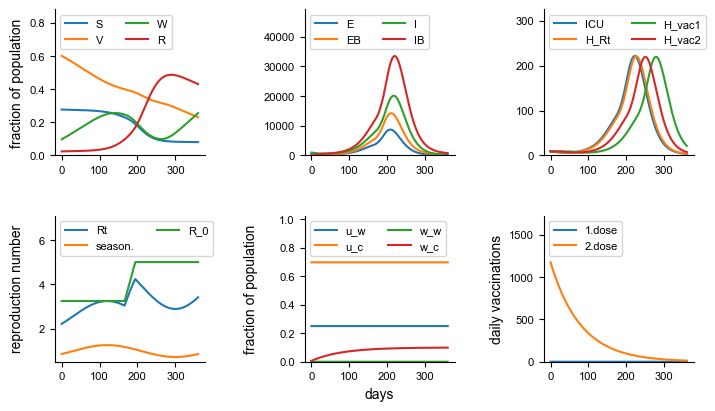

In [9]:
plotting.overview(mB, arial=True)

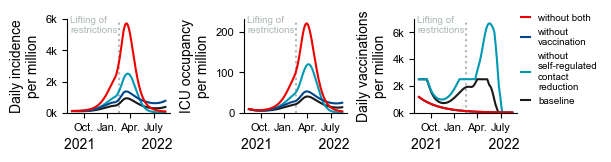

In [12]:
plotting.set_rcParams(arial=True)
mpl.rcParams["legend.fontsize"] = 7
fig = plt.figure(figsize=(6., 1.5), constrained_layout=True)
grid = fig.add_gridspec(ncols=3, nrows=1, wspace=0.05)

ax1 = fig.add_subplot(grid[0])
ax2 = fig.add_subplot(grid[1], sharex=ax1)
ax3 = fig.add_subplot(grid[2], sharex=ax1)

colors = {
    'base':'#1B1919FF',
    'noV':'#00468BFF', 'noR':'#0099B4FF', 'noB':'#ED0000FF',
    'line':'#ADB6B6FF',
}
main_colors = [colors['base'],colors['noR'],colors['noV'],colors['noB']]

t = m0.times
data = [m0.chopped_data(), mR.chopped_data(), mV.chopped_data(), mB.chopped_data()]

for i,m in enumerate([m0,mR,mV,mB]):
    ax1.plot(t, (m.rho*(data[i][:,3]+data[i][:,4])) /1000, color=main_colors[i])
    ax2.plot(t, data[i][:,7], color=main_colors[i])
    d1 = np.array(list(map(m.Phi, t, data[i][:,9])))*m.M
    d2 = np.array(list(map(m.phi, t, data[i][:,10])))*m.M
    ax3.plot(t, (2*d1+d2) /1000, color=main_colors[i])

for ax in [ax1,ax2,ax3]:
    ax.set_ylim(0,None)
    
ax1.set_ylabel("Daily incidence\nper million")
ax2.set_ylabel("ICU occupancy\nper million")
ax3.set_ylabel("Daily vaccinations\nper million")

    
ax1.set_xticks([45, 135, 45+2*90, 45+3*90])
ax1.set_xticklabels(['Oct.','Jan.','Apr.','July'])
for ax in [ax1,ax2,ax3]:
    ax.axvline(180, ls=':', color=colors['line'], zorder=0)
    ax.set_xlabel('2021            2022')

for ax in [ax1,ax2,ax3]:
    ax.text(0.03,0.85,'Lifting of\nrestrictions', size=7, color=colors['line'], transform=ax.transAxes)

fmt = '{x:g}k'
tick1 = mpl.ticker.StrMethodFormatter(fmt)
tick3 = mpl.ticker.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick1)
ax3.yaxis.set_major_formatter(tick3)

handles = [mpl.lines.Line2D([], [], color=colors['noB'], label='without both'),
           mpl.lines.Line2D([], [], color=colors['noV'], label='without\nvaccination'),
           mpl.lines.Line2D([], [], color=colors['noR'], label='without\nself-regulated\ncontact\nreduction'),
           mpl.lines.Line2D([], [], color=colors['base'], label='baseline')]
#ax1.legend(handles=handles, bbox_to_anchor=(0.52,0.3), ncol=1, frameon=False, handlelength=1.)
#ax3.legend(handles=handles, bbox_to_anchor=(1.0,1.15), ncol=1, frameon=False, handlelength=1.)
ax3.legend(handles=handles, bbox_to_anchor=(0.95,1.15), ncol=1, frameon=False, handlelength=1.)

plt.show()
fig.savefig("./figures/no_feedback.pdf")